In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import tensorflow as tf
import warnings

# CIR rate process

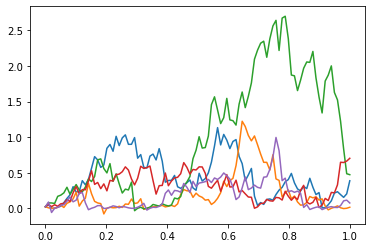

In [199]:
n = 100
n_samples = 150
r = np.zeros((n, n_samples))
t = np.linspace(0,1, n)
dt = t[1]-t[0]
r[0, :] = 0.021
theta = 0.5
kappa = 2.78
sigma = 0.2

for j in range(n_samples):
    for i in range(n - 1):
        if np.prod(r[i, j]>=0):
            r[i + 1, j] = r[i,j] + kappa*(theta-r[i,j])*dt +sigma*np.sqrt(r[i, j])*np.random.randn()
plt.plot(t, r[:, :5] );

## Pricing a bond

In [200]:
def h(a, sigma):
    return np.sqrt(a**2+2*sigma**2)

def A(t, T, theta, kappa):
    h_ = h(kappa, sigma)
    numerator = 2*h_*np.exp((kappa+h_)*(T-t)/2)
    denom = 2*h_+(kappa+h_)*(np.exp((T-t)*h_)-1)
    return (numerator/denom)**(2*kappa*theta/sigma**2)

def B(t, T, theta, kappa):
    h_ = h(kappa, sigma)
    numerator = 2*(np.exp((T-t)*h_)-1)
    denom = 2*h_+(kappa+h_)*(np.exp((T-t)*h_)-1)
    return numerator/denom

def bond_price(t, T, theta, kappa, rt):
    return A(t, T, theta, kappa)*np.exp(-B(t,T,theta,kappa)*rt)

Text(0.5, 1.0, '$T=1$ bond price')

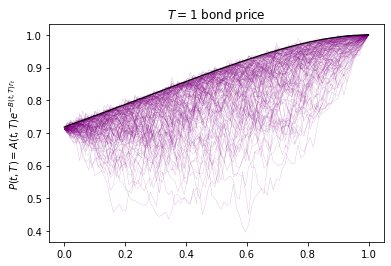

In [209]:
for i in range(0, 150):
    plt.plot(t, bond_price(t, 1, theta, kappa, r[:, i]), c="purple", lw=0.2, alpha=0.5)
plt.ylabel(r"$P(t,T)=A(t,T)e^{-B(t,T)r_t}$");
plt.plot(t,A(t, 1, theta, kappa), c='k', linewidth=1.2);
plt.title(r"$T=1$ bond price")

TODO: model calibration